In [1]:
import numpy as np
import matplotlib.pyplot as plt

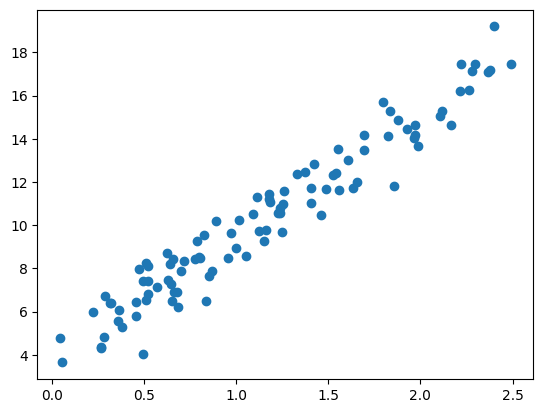

In [17]:
rng = np.random.RandomState(10)
x = 2.5 * np.random.rand(100, 1)
y = 4 + 5.5 * x + np.random.randn(100, 1)
plt.scatter(x, y)
m,n=x.shape

In [18]:
def loss_linear(y_hat,y):
    return np.mean(np.abs((y_hat - y) **3))

In [19]:
def loss_polynomial(y_hat,y):
    a=((y_hat - y) **7)
    return np.mean(np.abs(a))

In [20]:
def hypothesis(x,w,b):
    return w*x+b

In [29]:
def gradient_descent_linear(x,y,w,b,alpha,m):
    y_hat=hypothesis(x,w,b)
    dw = (1.0/m) * np.sum(np.multiply(x,(y_hat-y)))
    db = (1.0/m) * np.sum(y_hat-y)
    w = w -alpha * dw
    b = b - alpha * db
    return w,b

In [30]:
def gradient_descent_poly(x,y,w,b,alpha,m):
    y_hat=hypothesis(x,w,b)
    dw = (7.0/m) * np.sum(np.multiply(x,(y_hat-y)))
    db = (7.0/m) * np.sum((y_hat-y))
    w = w -alpha * dw
    b = b - alpha * db
    return w,b

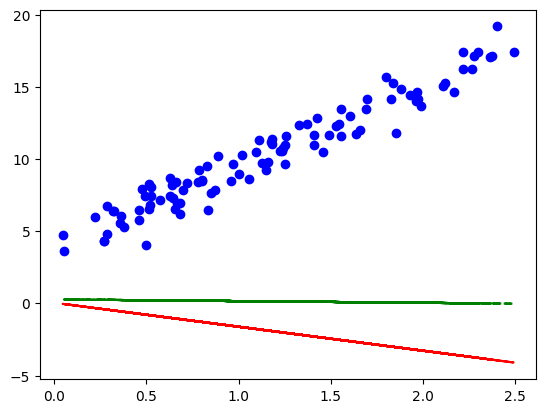

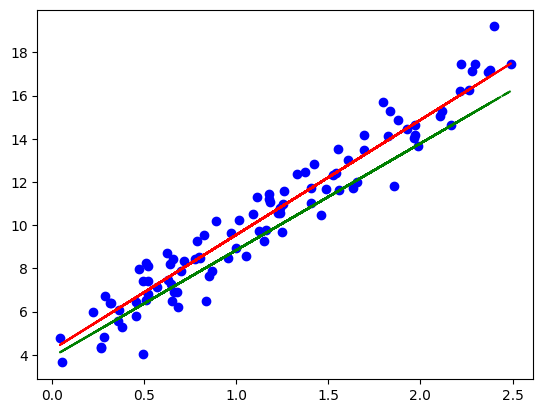

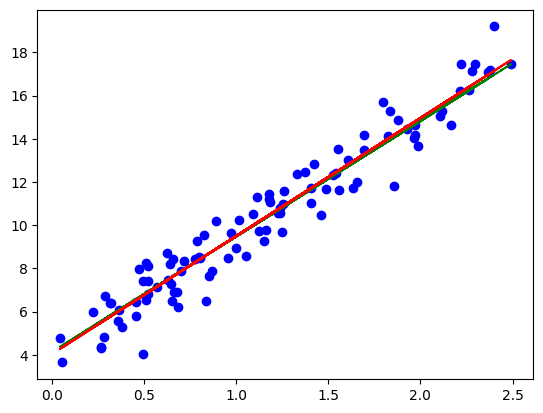

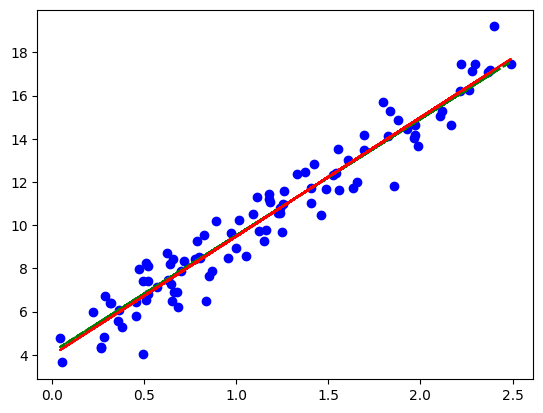

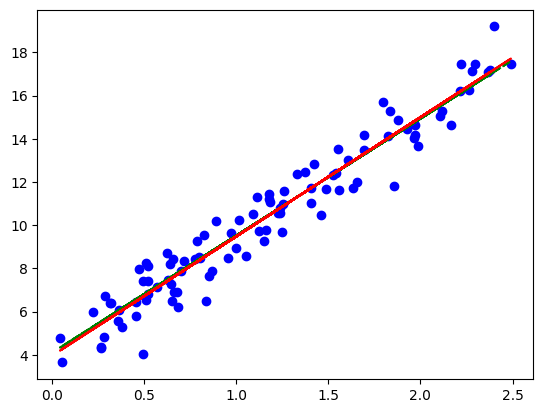

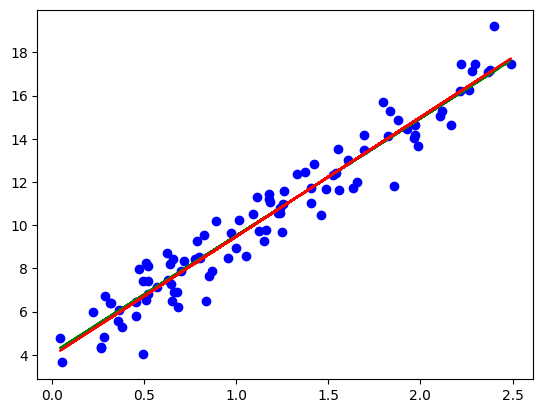

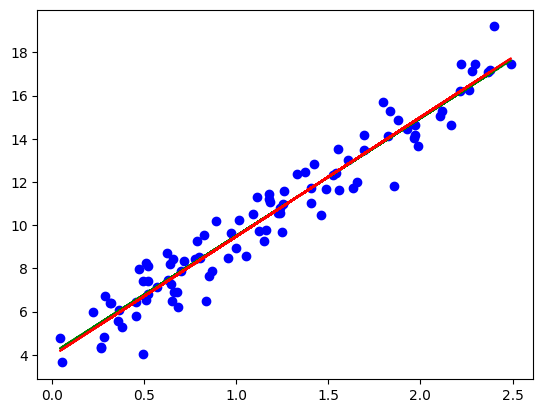

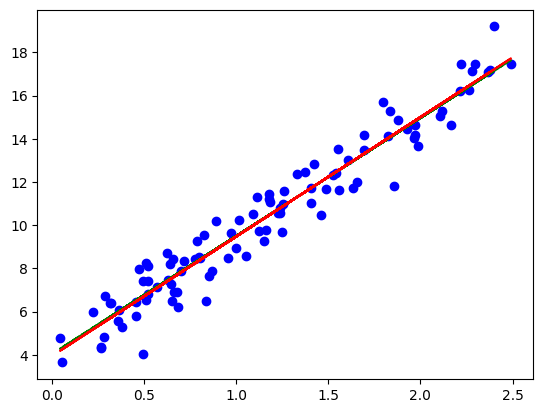

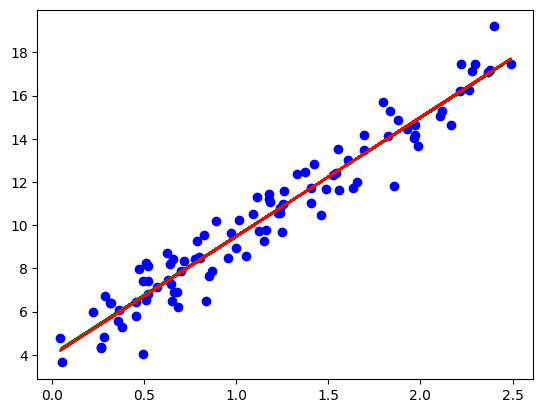

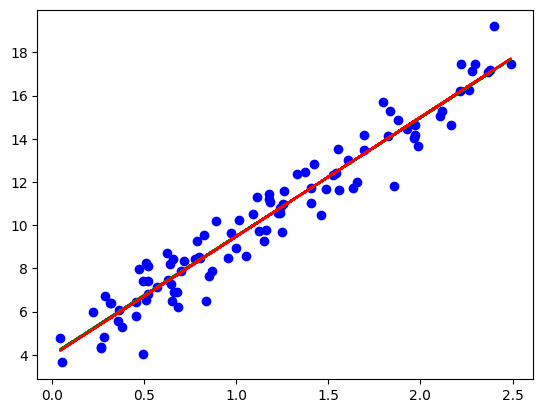

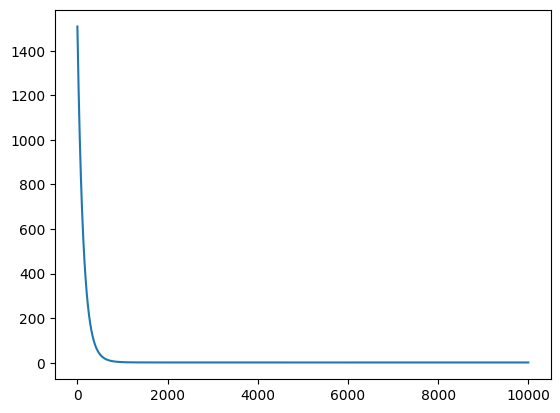

In [31]:
w = np.random.randn(1)
b = np.random.randn(1)
w1 = np.random.randn(1)
b1 = np.random.randn(1)
alpha = 0.001
num_epochs = 10000
L_linear=[]
L_poly=[]
for i in range(num_epochs):
    w, b = gradient_descent_linear(x,y,w,b,alpha,m)
    w1, b1 = gradient_descent_poly(x,y,w1,b1,alpha,m)
    y_hat = hypothesis(x,w,b)
    y_hat1 = hypothesis(x,w1,b1)
    L_linear.append(loss_linear(y_hat,y))
    L_poly.append(loss_polynomial(y_hat1,y))
    if (i%(num_epochs/10))==0:
        plt.plot(x,y,'bo')
        plt.plot(x,y_hat,'g--')
        plt.plot(x,y_hat1,'r')
        plt.show()
plt.plot(L_linear)

# USING SKLEARN


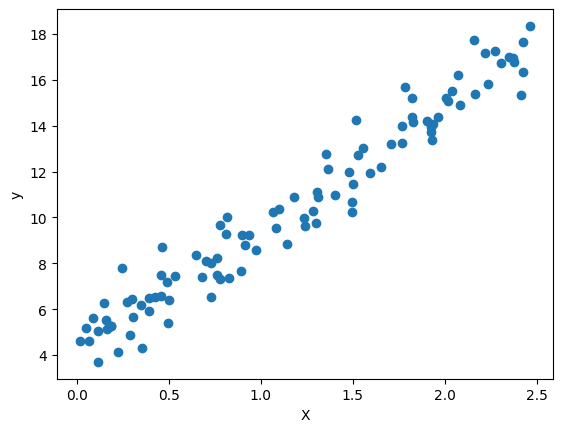

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate a dataset
np.random.seed(42)
X = 2.5 * np.random.rand(100, 1)
y = 4 + 5.5 * X + np.random.randn(100, 1)

# Create a DataFrame
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Plot the dataset
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

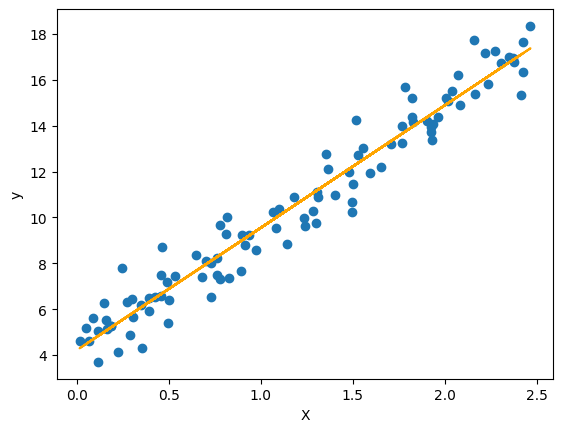

In [37]:
def linear_regression_loss_cubed(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)

    for epoch in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(np.sign(errors) * np.abs(errors)**2) / m
        theta -= learning_rate * gradient

    return theta
X_bias = np.c_[np.ones((100, 1)), X]
theta_linear_cubed = linear_regression_loss_cubed(X_bias, y)
plt.scatter(X, y)
plt.plot(X, X_bias.dot(theta_linear_cubed), color='orange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

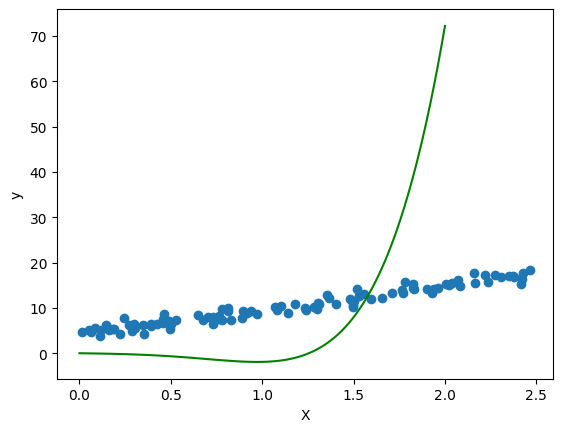

In [79]:
def polynomial_regression_loss_seventh(X, y, degree, learning_rate=0.000000000000000003, epochs=1000):
    X_poly = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7]  
    m, n = X_poly.shape
    theta = np.random.randn(n, 1)

    for epoch in range(epochs):
        predictions = X_poly.dot(theta)
        errors = predictions - y
        gradient = X_poly.T.dot(np.sign(errors) * np.abs(errors)) / m
        theta -= learning_rate * gradient

    return theta
degree = 7
theta_poly_seventh = polynomial_regression_loss_seventh(X, y, degree)
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
X_test_poly = np.c_[X_test, X_test**2, X_test**3, X_test**4, X_test**5, X_test**6, X_test**7]
y_poly_pred = X_test_poly.dot(theta_poly_seventh)
plt.scatter(X, y)
plt.plot(X_test, y_poly_pred, color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


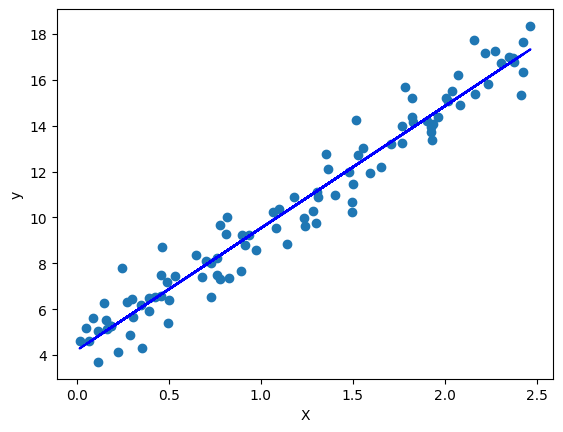

In [81]:
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Plot the sklearn linear regression model
plt.scatter(X, y)
plt.plot(X, model_sklearn.predict(X), color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

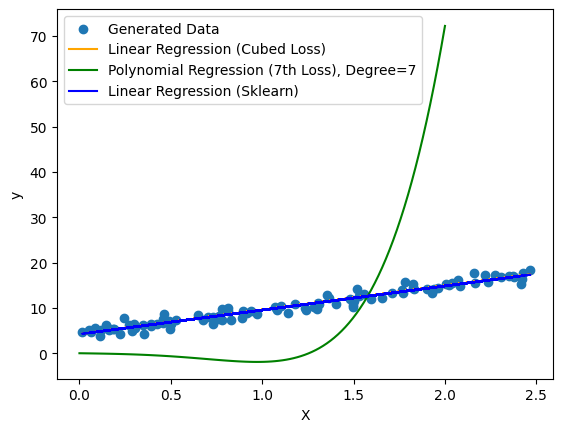

In [82]:
plt.scatter(X, y, label='Generated Data')
plt.plot(X, X_bias.dot(theta_linear_cubed), label='Linear Regression (Cubed Loss)', color='orange')
plt.plot(X_test, y_poly_pred, label=f'Polynomial Regression (7th Loss), Degree={degree}', color='green')
plt.plot(X, model_sklearn.predict(X), label='Linear Regression (Sklearn)', color='blue')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from io import BytesIO
from zipfile import ZipFile
import requests

# Download and extract the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
response = requests.get(url)
with ZipFile(BytesIO(response.content)) as zip_file:
    # Assuming you want to load the CSV file
    with zip_file.open('AirQualityUCI.csv') as csv_file:
        df = pd.read_csv(csv_file, sep=';', decimal=',', na_values=-200)

# Convert 'Time' to datetime object
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S', errors='coerce')

# Drop non-numeric columns and 'Date'
df = df.drop(['Date', 'Unnamed: 15', 'Unnamed: 16'], axis=1)

# Handle missing values for numeric columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Drop columns with no observed values
columns_with_observed_values = df[numeric_columns].columns[df[numeric_columns].notna().any()]

# Handle missing values only for columns with observed values
imputer = SimpleImputer(strategy='mean')
df[columns_with_observed_values] = imputer.fit_transform(df[columns_with_observed_values])

# Get insights from the correlation matrix
correlation_matrix = df.corr()

# Deal with outliers (you can customize this based on your analysis)
# For example, you can use z-score to identify and remove outliers
z_scores = np.abs((df[columns_with_observed_values] - df[columns_with_observed_values].mean()) / df[columns_with_observed_values].std())
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Exclude 'Time' from scaling
X = df_no_outliers.drop(['RH', 'Time'], axis=1)  # Features
y = df_no_outliers['RH']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear regression using sklearn
model_sklearn = LinearRegression()
model_sklearn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_sklearn = model_sklearn.predict(X_test_scaled)

# Calculate r2 score and mean squared error
r2_sklearn = r2_score(y_test, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

# Compare the results
print("R2 Score (Sklearn):", r2_sklearn)
print("Mean Squared Error (Sklearn):", mse_sklearn)

# Plot the results
plt.scatter(y_test, y_pred_sklearn, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Linear Regression using Sklearn')
plt.xlabel('Actual RH')
plt.ylabel('Predicted RH')
plt.show()
